In [91]:
import time
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from random import sample, shuffle, choice

# Fluid Communities Algorithm
Based on https://arxiv.org/pdf/1703.09307.pdf

In [21]:
def fluidC(G, k):
    assert k <= len(list(G.nodes()))
    flag = True
    
    init = sample(list(G.nodes()), k)
    groups = [[i] for i in init]
    dens = [1 for i in init]
    communities = dict()
    for i, x in enumerate(init):
        communities[x] = i
    tmp = list(G.nodes())
    epoch = 0
    
    while flag:
        epoch += 1
        flag = False
        shuffle(tmp)

        for node in tmp:
            neigh = list(G.neighbors(node))
            neigh.append(node)
            max_sum = 0
            max_arg = []
            
            for i in range(k):
                this_sum = 0
                for n in neigh:
                    if n in communities.keys() and communities[n] == i: 
                        this_sum += dens[i]
                if this_sum != 0 and this_sum == max_sum:
                    max_arg.append(i)
                elif this_sum > max_sum:
                    max_sum = this_sum
                    max_arg = [i]
                    
            if len(max_arg) > 0:
                if node in communities.keys() and communities[node] not in max_arg:
                    # change community of the node
                    old_com = communities[node]
                    new_com = choice(max_arg)
                    communities[node] = new_com
                    groups[old_com].remove(node)
                    groups[new_com].append(node)
                    
                    # update densities
                    dens[old_com] = 1/len(groups[old_com])
                    dens[new_com] = 1/len(groups[new_com])
                    
                    # update flag - a change's been made
                    flag = True
                    
                elif node not in communities.keys():
                    # add community to the node
                    com = choice(max_arg)
                    communities[node] = com
                    groups[com].append(node)
                    
                    # update density
                    dens[com] = 1/len(groups[com])
                    
                    # update flag - a change's been made
                    flag = True
        print('Superstep number:', epoch)
        print(groups)
    return groups, communities

# Competition for know number of clusters - Dataset 1

In [92]:
d1 = pd.read_csv('D1-K=2.csv', header=None).to_numpy()
d1

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [93]:
# Check if the dataset is symmetric
(d1.T == d1).all() # it is

True

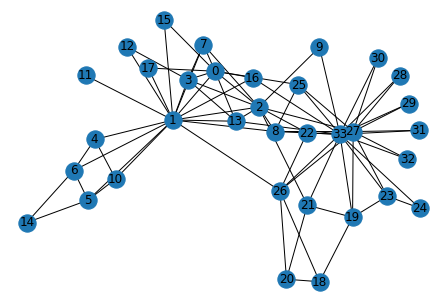

In [94]:
D1 = nx.convert_matrix.from_numpy_matrix(d1)
pos = nx.drawing.layout.spring_layout(D1)
nx.draw(D1, pos=pos, with_labels=True)

In [95]:
start_time = time.time()
node_groups, communities = fluidC(D1,2)
with open('Malgorzata_Wachulec/D1-K=2.csv', 'a') as f:
    for i in range(len(communities)):
        f.write(str(i+1))
        f.write(', ')
        f.write(str(communities[i]+1))
        f.write('\n')
print('Execution time:', time.time() - start_time)

Superstep number: 1
[[3, 13, 7, 0, 16, 12, 33, 2, 29, 19], [15, 1, 4, 11]]
Superstep number: 2
[[3, 13, 7, 0, 16, 33, 2, 29, 19, 30, 21, 27, 25, 18, 8, 31, 23, 20, 28, 22, 26, 32, 9, 24], [15, 1, 4, 11, 5, 10, 6, 12, 17]]
Superstep number: 3
[[33, 2, 29, 19, 30, 21, 27, 25, 18, 8, 31, 23, 20, 28, 22, 26, 32, 9, 24], [15, 1, 4, 11, 5, 10, 6, 12, 17, 3, 7, 0, 14, 16, 13]]
Superstep number: 4
[[33, 29, 19, 30, 21, 27, 25, 18, 8, 31, 23, 20, 28, 22, 26, 32, 9, 24], [15, 1, 4, 11, 5, 10, 6, 12, 17, 3, 7, 0, 14, 16, 13, 2]]
Superstep number: 5
[[33, 29, 19, 30, 21, 27, 25, 18, 8, 31, 23, 20, 28, 22, 26, 32, 9, 24], [15, 1, 4, 11, 5, 10, 6, 12, 17, 3, 7, 0, 14, 16, 13, 2]]
Execution time: 0.0029299259185791016


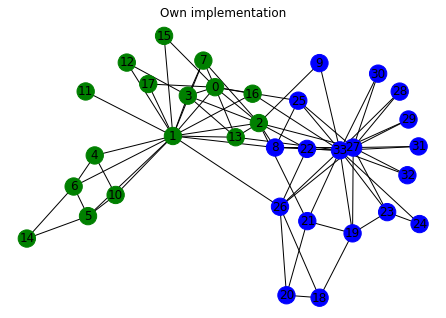

In [96]:
color_map = []
colors = ['b','g','y','r','k','c','m']
for node in D1:
    for i in range(len(node_groups)):
        if node in node_groups[i]:
            color_map.append(colors[i])
nx.draw(D1, node_color=color_map, with_labels=True, pos=pos)
plt.title('Own implementation')
plt.show()

# Competition for know number of clusters - Dataset 2

In [97]:
d2 = pd.read_csv('D2-K=7.csv', header=None).to_numpy()
d2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [98]:
# Check if the dataset is symmetric
(d2.T == d2).all() # it is

True

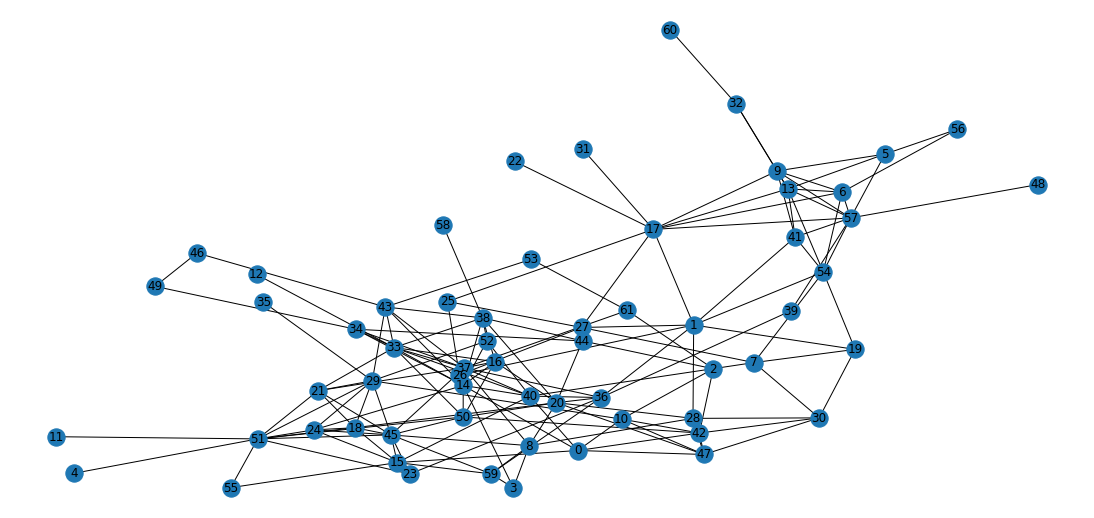

In [99]:
D2 = nx.convert_matrix.from_numpy_matrix(d2)
pos = nx.drawing.layout.spring_layout(D2)
plt.figure(figsize=(15,7))
nx.draw(D2, pos=pos, with_labels=True)

In [100]:
start_time = time.time()
node_groups, communities = fluidC(D2,7)
with open('Malgorzata_Wachulec/D2-K=7.csv', 'a') as f:
    for i in range(len(communities)):
        f.write(str(i+1))
        f.write(', ')
        f.write(str(communities[i]+1))
        f.write('\n')
print('Execution time:', time.time() - start_time)

Superstep number: 1
[[54, 57, 17, 25, 6, 22, 27, 1, 26, 19, 7], [21, 18, 51, 4, 55, 23, 45, 29, 24, 11], [50, 16, 33, 37, 38, 14, 61, 12, 58], [8, 3, 28, 20, 59], [0, 10, 40, 15, 47, 42, 2], [48], [41, 9, 32, 60, 5, 13, 56]]
Superstep number: 2
[[17, 25, 22, 27, 1, 26, 19, 7, 31], [21, 18, 51, 4, 55, 23, 45, 29, 24, 11, 35], [50, 16, 33, 37, 38, 14, 61, 12, 58, 53, 43, 52, 34], [8, 3, 28, 20, 59, 44, 36], [0, 10, 40, 15, 47, 42, 2, 30], [48, 57, 54, 41, 39], [9, 32, 60, 5, 13, 56, 6]]
Superstep number: 3
[[17, 25, 22, 27, 1, 26, 19, 7, 31], [21, 18, 51, 4, 55, 23, 45, 29, 24, 11, 35], [50, 16, 33, 37, 38, 14, 61, 12, 58, 53, 43, 52, 34, 49, 46], [8, 3, 28, 20, 59, 44, 36], [0, 10, 40, 15, 47, 42, 2, 30], [48, 57, 54, 41, 39], [9, 32, 60, 5, 13, 56, 6]]
Superstep number: 4
[[17, 25, 22, 27, 1, 26, 19, 7, 31], [21, 18, 51, 4, 55, 23, 45, 29, 24, 11, 35], [50, 16, 33, 37, 38, 14, 61, 12, 58, 53, 43, 52, 34, 49, 46], [8, 3, 28, 20, 59, 44, 36], [0, 10, 40, 15, 47, 42, 2, 30], [48, 57, 54, 

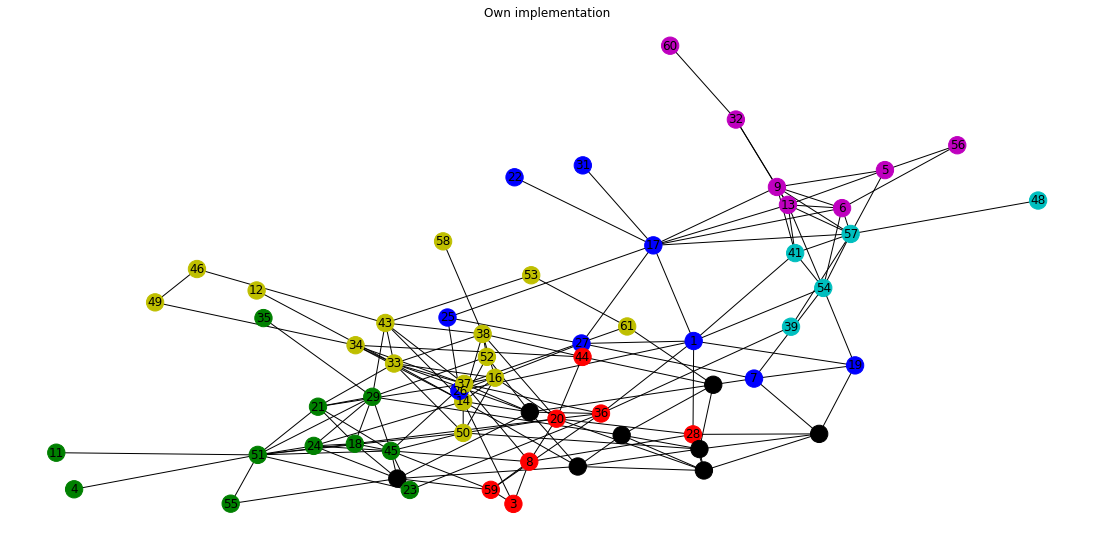

In [101]:
color_map = []
colors = ['b','g','y','r','k','c','m']
for node in D2:
    for i in range(len(node_groups)):
        if node in node_groups[i]:
            color_map.append(colors[i])
plt.figure(figsize=(15,7))
nx.draw(D2, node_color=color_map, with_labels=True, pos=pos)
plt.title('Own implementation')
plt.show()

# Competition for know number of clusters - Dataset 3

In [102]:
d3 = pd.read_csv('D3-K=12.csv', header=None).to_numpy()
d3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [103]:
# Check if the dataset is symmetric
(d3.T == d3).all() # it is

True

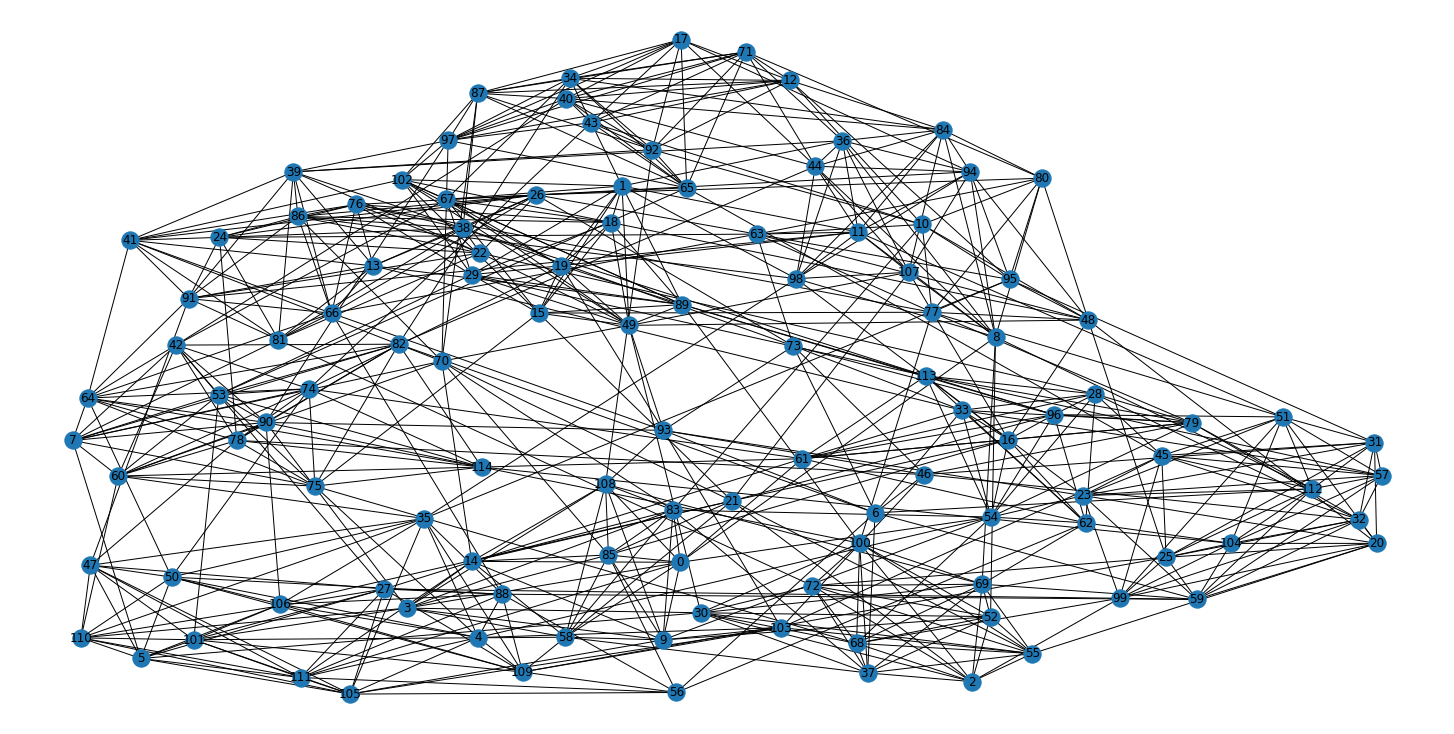

In [104]:
D3 = nx.convert_matrix.from_numpy_matrix(d3)
pos = nx.drawing.layout.spring_layout(D3)
plt.figure(figsize=(20,10))
nx.draw(D3, pos=pos, with_labels=True)

In [107]:
start_time = time.time()
node_groups, communities = fluidC(D3,12)
with open('Malgorzata_Wachulec/D3-K=12.csv', 'a') as f:
    for i in range(len(communities)):
        f.write(str(i+1))
        f.write(', ')
        f.write(str(communities[i]+1))
        f.write('\n')
print('Execution time:', time.time() - start_time)

Superstep number: 1
[[56, 58, 3, 85, 108, 14, 9], [51, 20, 104, 25, 99], [91, 86, 66, 76, 41, 70, 81, 39, 13, 24, 22, 38], [92, 65, 87, 34, 71, 17], [47, 5, 110, 35, 105, 50, 111, 101, 106, 88, 109, 4], [102, 97, 1, 89, 18, 29, 19, 49, 67], [23, 57, 59, 32, 31, 112, 45, 103, 93, 6], [27, 61, 62, 33, 54, 96, 28, 113, 79, 73], [72, 2, 21, 37, 83, 68, 52, 100, 69, 30, 55], [12, 43, 10, 95, 77, 48, 80], [75, 15, 78, 74, 60, 114, 53, 90, 7, 64, 82], [40, 42, 84, 36, 107, 44, 98, 94, 11]]
Superstep number: 2
[[58, 3, 85, 108, 14, 9, 0, 70, 83, 21], [51, 20, 104, 25, 99, 32, 59, 57], [91, 86, 66, 76, 41, 81, 39, 13, 24, 22, 38, 26], [92, 65, 87, 34, 71, 17, 12, 97, 43, 40], [47, 5, 110, 35, 105, 50, 111, 101, 106, 88, 109, 4, 56, 27], [102, 1, 89, 18, 29, 19, 49, 67, 15], [23, 31, 112, 45, 103, 93, 6, 46, 73], [61, 62, 33, 54, 96, 28, 113, 79, 16], [72, 2, 37, 68, 52, 100, 69, 30, 55], [10, 95, 77, 48, 80, 63], [75, 78, 74, 60, 114, 53, 90, 7, 64, 82, 42], [84, 36, 107, 44, 98, 94, 11, 8]]
Su

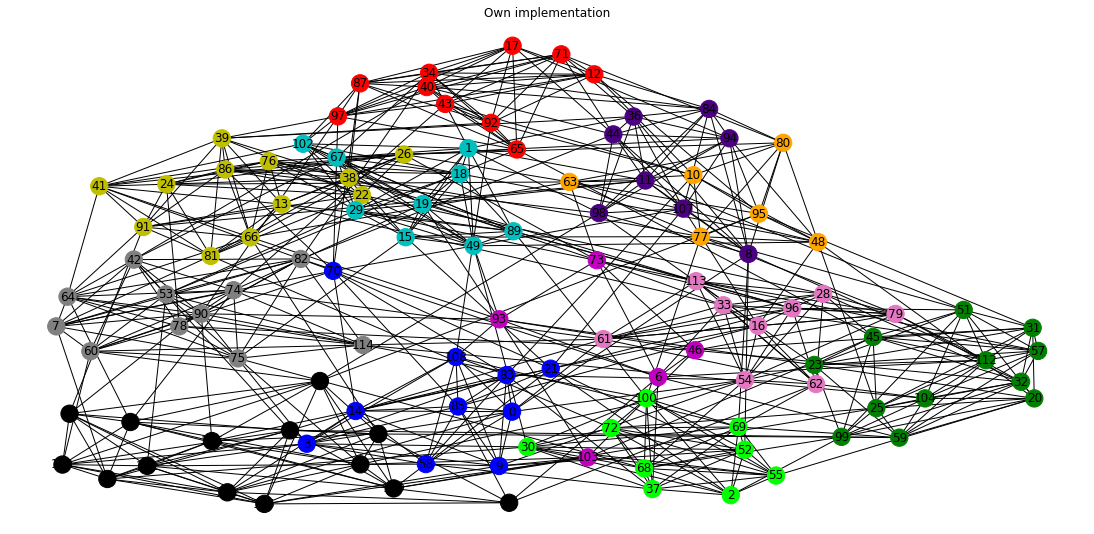

In [109]:
color_map = []
colors = ['b','g','y','r','k','c','m','tab:pink','lime','orange','gray','indigo','salmon']
for node in D3:
    for i in range(len(node_groups)):
        if node in node_groups[i]:
            color_map.append(colors[i])
plt.figure(figsize=(15,7))
nx.draw(D3, node_color=color_map, with_labels=True, pos=pos)
plt.title('Own implementation')
plt.show()